## 監督與非監督的學習

![AI](AI.PNG)

## SVM
![svm](SVM.PNG)

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 模擬數據 SVM

In [23]:
x=np.array([[6,6],[10,8],[2,4],[5,3]])

In [24]:
x[:,0]

array([ 6, 10,  2,  5])

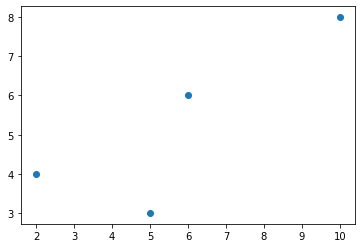

In [25]:
plt.scatter(x[:,0],x[:,1])

In [26]:
y=[2,2,1,1]

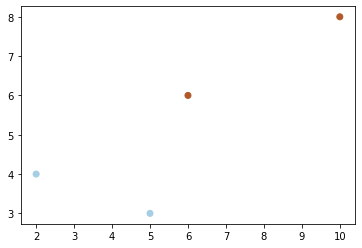

In [27]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')

### step1 開函數機

In [12]:
from sklearn.svm import SVC

In [13]:
clf=SVC()

### 學習資料

In [28]:

clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### test

In [29]:
clf.predict([[2,2]])

array([1])

In [27]:
clf.predict(x)

array([2, 2, 1, 1])

In [28]:
xr=np.random.rand(100)*8+2
yr=np.random.rand(100)*5+3

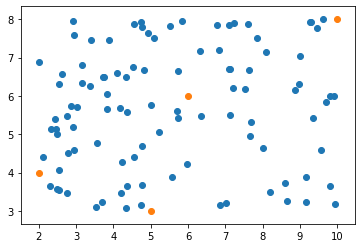

In [32]:
plt.scatter(xr,yr)
plt.scatter(x[:,0],x[:,1])

In [35]:
## 合併方法1
s=[[xr[i],yr[i]] for i in range(100)]

In [36]:
##合併方法2
X=np.c_[xr,yr]

In [38]:
## to guass
Y=clf.predict(X)

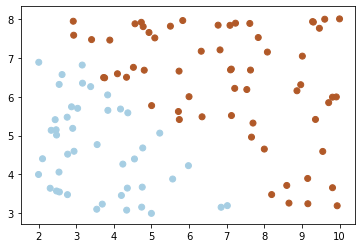

In [40]:
## show the random graph and original graph
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Paired')

## 用層次圖來呈現
![meshgrid](meshgrid1.PNG)
![meshgrid](meshgrid2.PNG)


In [30]:
## 製造 座標點 [2,10]*[3,8]
x_list=np.linspace(2,10,50)
y_list=np.linspace(3,8,50)
X,Y=np.meshgrid(x_list,y_list)

In [31]:
## show the first row for the x-coordinate
X[0,:]

array([ 2.        ,  2.16326531,  2.32653061,  2.48979592,  2.65306122,
        2.81632653,  2.97959184,  3.14285714,  3.30612245,  3.46938776,
        3.63265306,  3.79591837,  3.95918367,  4.12244898,  4.28571429,
        4.44897959,  4.6122449 ,  4.7755102 ,  4.93877551,  5.10204082,
        5.26530612,  5.42857143,  5.59183673,  5.75510204,  5.91836735,
        6.08163265,  6.24489796,  6.40816327,  6.57142857,  6.73469388,
        6.89795918,  7.06122449,  7.2244898 ,  7.3877551 ,  7.55102041,
        7.71428571,  7.87755102,  8.04081633,  8.20408163,  8.36734694,
        8.53061224,  8.69387755,  8.85714286,  9.02040816,  9.18367347,
        9.34693878,  9.51020408,  9.67346939,  9.83673469, 10.        ])

In [32]:
## show the first column for the y-coordinate
Y[:,0]

array([3.        , 3.10204082, 3.20408163, 3.30612245, 3.40816327,
       3.51020408, 3.6122449 , 3.71428571, 3.81632653, 3.91836735,
       4.02040816, 4.12244898, 4.2244898 , 4.32653061, 4.42857143,
       4.53061224, 4.63265306, 4.73469388, 4.83673469, 4.93877551,
       5.04081633, 5.14285714, 5.24489796, 5.34693878, 5.44897959,
       5.55102041, 5.65306122, 5.75510204, 5.85714286, 5.95918367,
       6.06122449, 6.16326531, 6.26530612, 6.36734694, 6.46938776,
       6.57142857, 6.67346939, 6.7755102 , 6.87755102, 6.97959184,
       7.08163265, 7.18367347, 7.28571429, 7.3877551 , 7.48979592,
       7.59183673, 7.69387755, 7.79591837, 7.89795918, 8.        ])

In [33]:
## Using the ravel to melt and predict
## remark P is point in two coord (x,y)
P=np.c_[X.ravel(),Y.ravel()]
C=clf.predict(P)

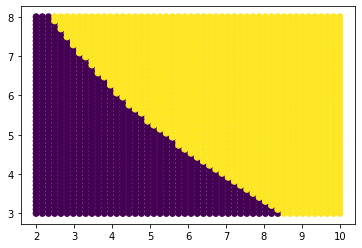

In [34]:
## show the graph
plt.scatter(P[:,0],P[:,1],c=C)

## 另外介紹 contour(切和原本我所說的層次圖，三維等高線的意思)f:R^2-->R 

![contour](counter.PNG)

In [35]:
## 
xl=np.array([1,2,3,4])
yl=np.array([5,6,7,8])
X,Y=np.meshgrid(xl,yl)

In [36]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [37]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [38]:
Z=np.random.randint(1,3,(4,4))

In [39]:
Z

array([[1, 2, 2, 1],
       [1, 1, 1, 2],
       [2, 2, 1, 2],
       [2, 1, 2, 1]])

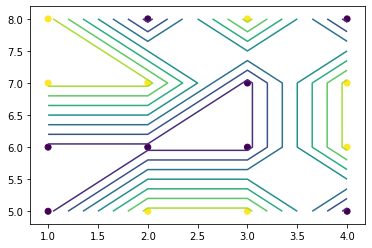

In [40]:
## both are different for method point(點著顏色) and line(曲線著顏色)
## 同一類 產線 並且會按照線再畫出 漸層線
plt.contour(X,Y,Z)
plt.scatter(X.ravel(),Y.ravel(),c=Z.ravel())

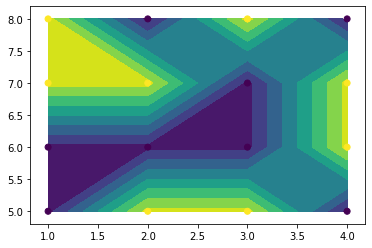

In [42]:
## 劃出漸層圖(coutourf)
plt.contourf(X,Y,Z)
plt.scatter(X.ravel(),Y.ravel(),c=Z.ravel())

### 終極版視覺資料

In [59]:
x_arr=np.arange(2,10,0.02)
y_arr=np.arange(3,8,0.02)

In [55]:
X,Y=np.meshgrid(x_arr,y_arr)


In [57]:
P=np.c_[X.ravel(),Y.ravel()]

In [61]:
P

array([[2.  , 3.  ],
       [2.02, 3.  ],
       [2.04, 3.  ],
       ...,
       [9.94, 7.98],
       [9.96, 7.98],
       [9.98, 7.98]])

In [63]:
C=clf.predict(P)

In [66]:
X

array([[2.  , 2.02, 2.04, ..., 9.94, 9.96, 9.98],
       [2.  , 2.02, 2.04, ..., 9.94, 9.96, 9.98],
       [2.  , 2.02, 2.04, ..., 9.94, 9.96, 9.98],
       ...,
       [2.  , 2.02, 2.04, ..., 9.94, 9.96, 9.98],
       [2.  , 2.02, 2.04, ..., 9.94, 9.96, 9.98],
       [2.  , 2.02, 2.04, ..., 9.94, 9.96, 9.98]])

In [68]:
Y

array([[3.  , 3.  , 3.  , ..., 3.  , 3.  , 3.  ],
       [3.02, 3.02, 3.02, ..., 3.02, 3.02, 3.02],
       [3.04, 3.04, 3.04, ..., 3.04, 3.04, 3.04],
       ...,
       [7.94, 7.94, 7.94, ..., 7.94, 7.94, 7.94],
       [7.96, 7.96, 7.96, ..., 7.96, 7.96, 7.96],
       [7.98, 7.98, 7.98, ..., 7.98, 7.98, 7.98]])

In [70]:
## predict color
C

array([1, 1, 1, ..., 2, 2, 2])

In [76]:
## 檢查 size
print("X:",len(X),X.size,len(X[0]))

X: 250 100000 400


In [78]:
C.reshape(250,400)

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

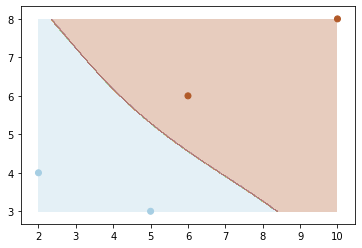

In [84]:
## 終極畫圖ok alpha 是透明度
plt.contourf(X,Y,C.reshape(X.shape),cmap='Paired',alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='Paired')

# 鳶尾花

In [88]:
from sklearn.datasets import load_iris

In [90]:
iris=load_iris()

In [95]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [96]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [99]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [104]:
df["flower"]=iris.target

In [106]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [146]:
df.columns!='flower'

array([ True,  True,  True,  True, False])

In [157]:
df[df.columns[:-1]]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [160]:
df.loc[:,"sepal length (cm)":"petal width (cm)"]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [163]:
x=np.array(df.loc[:,"sepal length (cm)":"petal width (cm)"])

In [167]:
y=np.array(df.loc[:,"flower":])

In [175]:
## 為了方便畫圖 我們曲前面兩個數據當作輸入 第一個 : 分界線 row and coloum 逗點
## 代表區分我們下次要做甚麼 而不等差拿取 第二個 :代表從何處到何處
x[:,:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [179]:
## 事實上 分界線也不能說是從第一位置來判斷 而是根據逗點和數字來左右 ,n or n,
x[2:4,:]

array([[4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [190]:
## 取前兩個
X=x[:,:2]

In [184]:
Y=y

In [185]:
## 區分資料群
from sklearn.model_selection import train_test_split

In [192]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

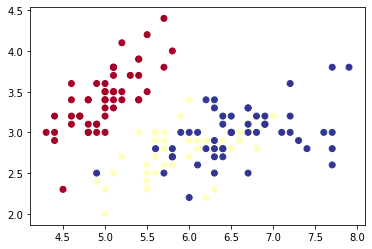

In [211]:
## 從圖的資料群中 發現右下
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(X[:,0],X[:,1],c=Y.ravel(),cmap=cm)

In [213]:
## 開函數機 
from sklearn.svm import SVC

In [216]:
clf=SVC(gamma='auto')

In [219]:
clf.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [221]:
y_pred=clf.predict(x_test)

In [244]:
yr=(y_pred-y_test.ravel())

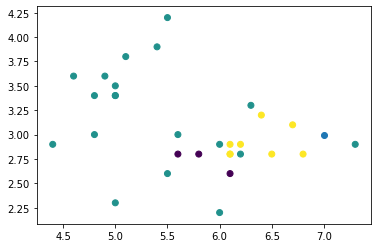

In [270]:
plt.scatter(x_test[:,0],x_test[:,1],c=yr)


In [233]:
len(y_pred)

30

In [235]:
len(y_test)

30

In [245]:
len(yr)

30

In [257]:
yr

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

In [271]:
y_pred

array([1, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [277]:
## 標示 預測準的圖
G=x_test[yr==0]

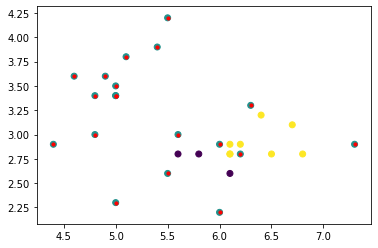

In [281]:
##畫出圖
plt.scatter(x_test[:,0],x_test[:,1],c=yr)
plt.scatter(G[:,0],G[:,1],s=10,c='r')

In [287]:
x0=np.arange(3.8,8.2,0.02)
y0=np.arange(1.8,4.7,0.02)
xm,ym=np.meshgrid(x0,y0)
P=np.c_[xm.ravel(),ym.ravel()]

In [290]:
z=clf.predict(P)

In [293]:
Z=z.reshape(xm.shape)

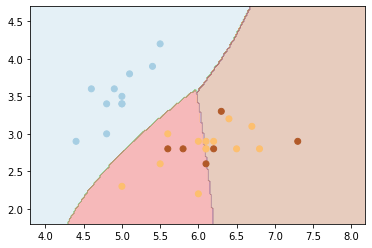

In [302]:
plt.contourf(xm,ym,Z,cmap='Paired',alpha=0.3)
plt.scatter(x_test[:,0],x_test[:,1],cmap='Paired',c=y_test.ravel())